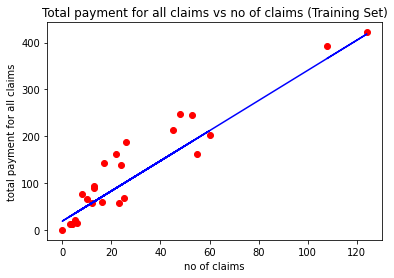

RMSE: 39.689


In [ ]:
from random import seed
import matplotlib.pyplot as plt
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
  dataset = list()
  with open(filename, 'r') as file:
    next(file)
    csv_reader = reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
  for row in dataset:
    row[column] = float(row[column].strip())

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
  train, test = train_test_split(dataset, split)
  test_set = list()
  for row in test:
    row_copy = list(row)
    row_copy[-1] =  None
    test_set.append(row_copy)
  predicted = algorithm(train, test_set, *args)
  actual = [row[-1] for row in test]

  x_train = [row[0] for row in test]
  y_train = [row[1] for row in test]
  # y_predicted = [row[0] for row in predicted]
  plt.scatter(x_train, y_train, color = 'red')
  plt.plot(x_train, predicted, color = 'blue')
  plt.title('Total payment for all claims vs no of claims (Training Set)')
  plt.xlabel('no of claims')
  plt.ylabel('total payment for all claims')
  plt.show()

  rmse = rmse_metric(actual, predicted)
  return rmse

# Split a dataset into a train and test set
def train_test_split(dataset, split):
  train = list()
  train_size = split * len(dataset)
  dataset_copy = list(dataset)
  # print(`len(dataset)=%s; train_size=%s; len(dataset_copy)=%s` % (len(dataset), train_size, len(dataset_copy)))
  while len(train) < train_size:
    index = randrange(len(dataset_copy))
    train.append(dataset_copy.pop(index))
  return train, dataset_copy

# Simple linear regression algorithm
def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    yhat = b0 + b1 * row[0]
    predictions.append(yhat)
  return predictions

# Calculate coefficients
def coefficients(dataset):
  x = [row[0] for row in dataset]
  y = [row[1] for row in dataset]
  x_mean, y_mean = mean(x), mean(y)
  b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
  b0 = y_mean - b1 * x_mean
  return [b0, b1]

# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))

# Calculate covarience between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

# Load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0])):
  str_column_to_float(dataset, i)
#print(dataset)

split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))